<a href="https://colab.research.google.com/github/tbeucler/2022_Intro_Python/blob/main/Tutorials/W4_S1_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression**
One of the statistical method that can be useful in many data analysis settings is regression. 

Regression problems can be conceptualize with the following simple scenario: Assuming you have some measurements of how one physical property relates to another physical property in real life.

Reference: 
1. Machine Learning Foundations and Practice (CS345_Colorado State University)

Let's create some fake data!

In [ ]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

In [ ]:
seed = 40001
rng = default_rng(seed)
x = 10*rng.random(50)
y = 2 * x - 5 + rng.standard_normal(50)*2.5

Just now we created 50 random data points in one physical dimension (X), we assumed that the measurements in the X dimension relates to another dimension (Y) with the following equation:
$y = 2x-5$

To mimic real observations, we add some random uncertainties so that these "observations" would not exactly follow the equation.

Now let's see how the fake data looks like!

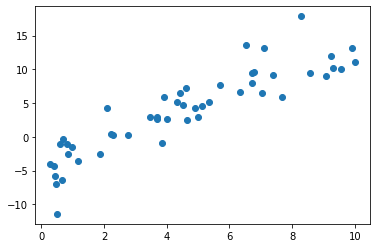

In [ ]:
plt.scatter(x,y)
plt.show()

If we have a data that only has information for the X coordinate, and we assume the underlying relationship between Y and X still holds, we can get plug in the observed X into the equation to get the corresponding Y value!

But how do you find $y = 2x-5$ just from the data? This is where **regression** comes in. 

In one dimension, linear regression takes the following form:

$$
\large
y =  wx + b
$$

$w$ and $b$ are the **model parameters** we would like to optimize based on the data we currently have. As soon as we get the equation, we can use it to make predictions on new data (e.g., the examples we just discussed)

Fortunately, we do not need to code the model optimization and parameters finding procedure from scratch! We can just use the pre-packaged sklearn [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) functions instead. 

Let's try it out!

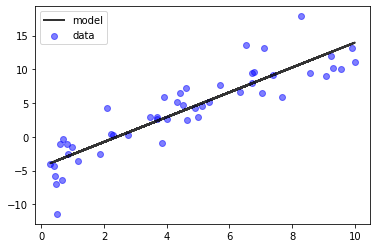

In [ ]:
from sklearn.linear_model import LinearRegression

# instantiate, fit, and predict:
# (Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.)
linreg = LinearRegression()
linreg.fit(x.reshape(-1,1), y.reshape(-1,1))
y_pred = linreg.predict(x.reshape(-1,1))

# plot the reslts
plt.scatter(x, y,  color='blue', alpha=0.5, label = 'data')
plt.plot(x, y_pred, color='black', alpha=0.8,linewidth=2, label = 'model')
plt.legend(loc="best")
plt.show()

This is what the optimized parameters look like. The values are not exactly what we defined originally, but it's in the same ballpark.

In [ ]:
#print(f"Model Prediction:{linreg.predict(np.asarray(2).reshape(1,-1))}")
#print(f"Real:{2*2-5}")
print(f"w:{np.round(float(linreg.coef_),decimals=2)},b:{np.round(float(linreg.intercept_),decimals=2)}")

w:1.84,b:-4.44


One way to get a more accurate model is to obtain more data. Observe the model parameters are way more accurate when we use 10000 data points to train the regression model.

In [ ]:
seed = 40001
rng = default_rng(seed)
x = 10*rng.random(10000)
y = 2 * x - 5 + rng.standard_normal(10000)*2.5
linregN = LinearRegression()
linregN.fit(x.reshape(-1,1), y.reshape(-1,1))
print(f"w:{np.round(float(linregN.coef_),decimals=2)},b:{np.round(float(linregN.intercept_),decimals=2)}")

w:2.0,b:-4.97


How are the model parameters derived? In the scikit-learn package, the least-squared method is used.

The parameters $(w,b)$ are chosen as to minimize the sum-squared error:
$$
J( w,b ) = \sum_{i=1}^N (y_i - \hat{y}_i)^2,
$$

where $y_i$ are the known labels and $\hat{y}_i = w x_i + b$ are the predicted labels. So the function actually repeats the model prediction multiple times with different `w` and `b`, and ultimately settles on the combination that minimizes the `J`.

### **Exercise: Multivariate Linear Regression**
What if our dataset has multiple dimensions and we want to find equations that looks something like this?
$$
y = w_1 x_1 + w_2 x_2 + w_3 x_3 + ... + b
$$

Here we show how we would do it with scikit-learn to find a linear equation that describes the Kaggle [Advertising dataset](https://www.kaggle.com/datasets/bumba5341/advertisingcsv?resource=download)

**Q1: Use pandas to import the advertising dataset**

In [ ]:
import pandas

# Q1a: Use pandas to import the dataset
__ = pandas.__(_,_)
# Q1b: Display the first rows of the data with pandas
__.__()

In [ ]:
#@title Answers
# Import a dataset of advertising spends
advert = pandas.read_csv('myadvertising.csv', index_col=0)

# Display the first five rows of the data
advert.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Q2: Try to use scikit-learn linear regression model to predict "Sales" from three columns "TV", "Radio", "Newspaper"**

This model will basically tell us how sales would change if we put resources to advertise products in three different medias.

In [ ]:
from sklearn.____ import ____

# Construct Input / Output matrices
Xall = __[[_,_,_]].values
y = _[].values
linreg = ___
linreg.__(_,_)

In [ ]:
#@title Answer
from sklearn.linear_model import LinearRegression

Xall = advert[['TV', 'Radio', 'Newspaper']].values
y    = advert['Sales'].values

linreg = LinearRegression(); linreg.fit(Xall, y)

LinearRegression()

**Q3: Print out the linear equation coefficients and intercept**

In [ ]:
cfs = [round(x,_) for x in linreg.____]
print(f'Coefficients {cfs}, Intercept {linreg.____:5.2f}' )

In [ ]:
#@title Answer
cfs = [round(x,4) for x in linreg.coef_]
print(f'Coefficients {cfs}, Intercept {linreg.intercept_:5.2f}' )

Coefficients [0.0458, 0.1885, -0.001], Intercept  2.94


## **Classification**
So now we have introduced how to use regression tools to find linear relationships in observation data. Using the trained regression models, we can make predictions when we want to "fill in" incomplete data.

However, there are some data analysis tasks that it would not make sense to use regression tools. For example, we have a large quantities of unlabeled data of penguins physical characteristics. We want to find the optimal way to separate the data into different clusters. Each cluster will then represent one specific type of penguins. These ***classification tasks*** can be helpful when we try to interpret a complex, high-dimensional dataset.

Classification tasks are difficult to phase in a way that regression tools can be used. Here, we will introduce some algorithms that specifically deal with clustering tasks.

Reference:
1. Python Data Science Handbook
2. UC Davis - AIX0008 (Introduction to Data Science, summer 2022)
3. Tutorial for R package (clusterpval; https://www.lucylgao.com/clusterpval/index.html)

#### K-means clustering
There are a lot of clustering algorithms. We can't introduce them all here! *k*-means clustering is probably the algorithm that is easiest to understand, it tries to separate data points in an unlabeled multidimensional dataset based on pre-determined number of clusters.

First step in the *k*-means algorithms label data involves K different randomly-initiated centriods points in the data. Based on distance comparison, we will get a first guess of how data points are distributed in the clusters.Obviously this would never be the optimal separation! The *k*-means algorithm optimizes by iteratively updating the centroid locations. After the first iteration, centroids are moved to the mean coordinates of different clusters. The process is repeated till solution converges.

In the converge solution, each point is closer to its own cluster center than to the other cluster centers.

Here is a visual depiction of the algorithm from the "Python Data Science Handbook"

<img style="padding: 10px; float:left;" alt="20 points and their Voronoi cells by Balu Ertl CC BY-SA 4.0" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.11-expectation-maximization.png?raw=1" width="1000">

First, let's generate a fake two-dimensional dataset containing four distinct blobs to see how the algorithm works in real practice.

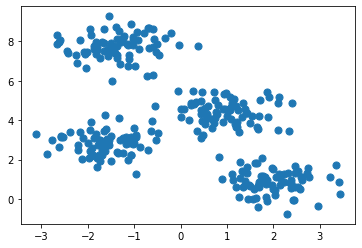

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

KMeans algorithm is available in the scikit-learn package!

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

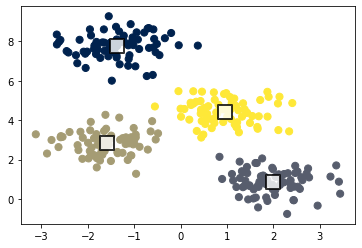

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='cividis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='white', s=200, alpha=0.8,edgecolors='k',linewidths=2,marker='s')
plt.show()

Neat! Now let's move to a real environmental dataset!

### **Palmer Penguin Dataset**

In this tutorial, we will discuss how to apply classification tools on a real dataset. The dataset that we will be using henceforth is the **Palmer Penguin Dataset** (collected by Kristen Gorman). 

This dataset contains 344 entries of the physical attributes of penguins resided in the Palmer Archipelego, Antarctica. These penguins actually belong to three different species.

<img style="padding: 10px; float:left;" alt="20 points and their Voronoi cells by Balu Ertl CC BY-SA 4.0" src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width="400">

Let's try to read in the dataset and visualize it first.

In [12]:
import pandas as pd
penguins = pd.read_csv('./penguins_size.csv')
print(penguins.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


Remove the entries without data

In [13]:
penguin_df = (penguins.dropna())
penguin_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [18]:
penguin_df[penguin_df['species']=='Adelie']['flipper_length_mm']

0      181.0
1      186.0
2      195.0
4      193.0
5      190.0
       ...  
147    184.0
148    195.0
149    193.0
150    187.0
151    201.0
Name: flipper_length_mm, Length: 146, dtype: float64

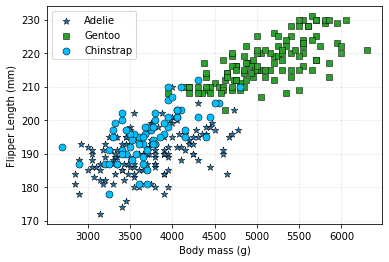

In [34]:
Adelie, Gentoo, Chinstrap = penguin_df[penguin_df['species']=='Adelie'], penguin_df[penguin_df['species']=='Gentoo'], \
penguin_df[penguin_df['species']=='Chinstrap']

plt.scatter(Adelie['body_mass_g'], Adelie['flipper_length_mm'],s=50,marker='*',label='Adelie',c='#1f77b4',edgecolors='k',linewidths=0.5)
plt.scatter(Gentoo['body_mass_g'], Gentoo['flipper_length_mm'],s=30,marker='s',label='Gentoo',c='#2ca02c',edgecolors='k',linewidths=0.5)
plt.scatter(Chinstrap['body_mass_g'], Chinstrap['flipper_length_mm'],s=50,marker='o',label='Chinstrap',c='deepskyblue',edgecolors='k',linewidths=0.5)
plt.grid(linestyle='--',alpha=0.3)
plt.ylabel('Flipper Length (mm)')
plt.xlabel('Body mass (g)')
plt.legend()
plt.show()


Seems like Gentoo penguins are distinct from the other two penguins, specifically they are heavier and have longer flippers. But it is very difficult to separate chinstraps or adelies in this 2-D plane.

This means that body mass and flipper lengths might not be the ideal combination to demonstrate how classification tools work!

Let's try "culmen_length_mm" and "Flipper_length_mm"?

<img style="padding: 10px; float:left;" alt="20 points and their Voronoi cells by Balu Ertl CC BY-SA 4.0" src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="400">


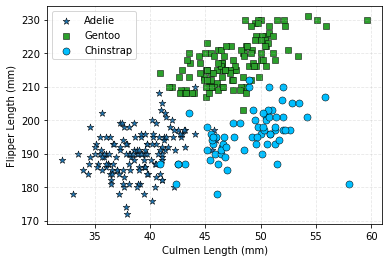

In [35]:
plt.scatter(Adelie['culmen_length_mm'], Adelie['flipper_length_mm'],s=50,marker='*',label='Adelie',c='#1f77b4',edgecolors='k',linewidths=0.5)
plt.scatter(Gentoo['culmen_length_mm'], Gentoo['flipper_length_mm'],s=30,marker='s',label='Gentoo',c='#2ca02c',edgecolors='k',linewidths=0.5)
plt.scatter(Chinstrap['culmen_length_mm'], Chinstrap['flipper_length_mm'],s=50,marker='o',label='Chinstrap',c='deepskyblue',edgecolors='k',linewidths=0.5)
plt.grid(linestyle='--',alpha=0.3)
plt.ylabel('Flipper Length (mm)')
plt.xlabel('Culmen Length (mm)')
plt.legend()
plt.show()

The figure above suggests that one way to separate the three penguin species is to look at the combination of the lengths of their bills and their flippers. In particular, the Chinstraps have similar flipper lengths to the Adelies, but their culmens are more comparable to the Gentoos.

Let's try to use *k*-means clustering in the culmen length-flipper length 2D plane!

In [41]:
import numpy as np
X = np.vstack((penguin_df['culmen_length_mm'],penguin_df['flipper_length_mm'])).T

In [42]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [47]:
penguin_df['label'] = y_kmeans

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


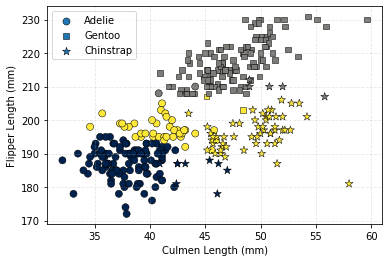

In [56]:
plt.scatter(penguin_df[penguin_df['species']=='Adelie']['culmen_length_mm'], penguin_df[penguin_df['species']=='Adelie']['flipper_length_mm'],
            c=penguin_df[penguin_df['species']=='Adelie']['label'],
            s=50,marker='o',label='Adelie', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.scatter(penguin_df[penguin_df['species']=='Gentoo']['culmen_length_mm'], penguin_df[penguin_df['species']=='Gentoo']['flipper_length_mm'],
            c=penguin_df[penguin_df['species']=='Gentoo']['label'],
            s=30,marker='s',label='Gentoo', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.scatter(penguin_df[penguin_df['species']=='Chinstrap']['culmen_length_mm'], penguin_df[penguin_df['species']=='Chinstrap']['flipper_length_mm'],
            c=penguin_df[penguin_df['species']=='Chinstrap']['label'],
            s=70,marker='*',label='Chinstrap', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.grid(linestyle='--',alpha=0.3)
plt.ylabel('Flipper Length (mm)')
plt.xlabel('Culmen Length (mm)')
plt.legend()
plt.show()

The figure above shows the clustering algorithm can correctly classify most of the penguins. Different labels seem to nicely correspond to samples from penguins from different species. However, the algorithm seems to struggle a bit in classifying Adelies with longer flippers, which are assigned the same label as the Chinstraps. 

But it is already is great first step!